In [ ]:
#pip install pandas numpy matplotlib scikit-learn lifelines Jinja2

In [62]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter



In [22]:
og_data = pd.read_csv('D:\VS_adv_python\customer_churn\data\WA_Fn-UseC_-Telco-Customer-Churn.csv')
og_data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [23]:
og_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [24]:
df = og_data.copy()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [26]:

df.columns = df.columns.str.strip()

In [27]:
# Target
df['event'] = np.where(df['Churn'] == 'Yes',1,0)
df['duration'] = df['tenure']

In [28]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [ ]:
# dropping unwanted columns

df = df.drop(columns = ['Churn','tenure','customerID'])
df.to_csv('D:\VS_adv_python\customer_churn\data\processed_df.csv')


In [3]:
df = pd.read_csv('D:\VS_adv_python\customer_churn\data\processed_df.csv', index_col = 0)

In [4]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,event,duration
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,34
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,2
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,45
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,2


In [19]:
# converting categorical variables using one-hot encode

cat_cols = df.select_dtypes(include= 'object').columns

df_encoded = pd.get_dummies(df, columns= cat_cols, drop_first= False, dtype=int)

In [31]:
final_df = df_encoded.copy()

In [32]:
final_df.to_csv('D:\VS_adv_python\customer_churn\data\survival_df_encoded.csv')

In [5]:
survival_df_enc = pd.read_csv('D:\VS_adv_python\customer_churn\data\survival_df_encoded.csv', index_col= 0)

In [6]:
survival_df_enc.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,event,duration,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,29.85,29.85,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,56.95,1889.50,0,34,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,53.85,108.15,1,2,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,42.30,1840.75,0,45,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,70.70,151.65,1,2,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


A Kaplan-Meier (KM) curve is a step-like graph showing the probability of survival over time, used in survival analysis to estimate how long subjects remain event-free (like surviving a disease or a machine part functioning) while accounting for censored data, where follow-up is incomplete. It plots time (X-axis) against the proportion of survivors (Y-axis), showing survival probability as horizontal steps that drop at each event, with tick marks indicating censored data points where the event status is unknown.

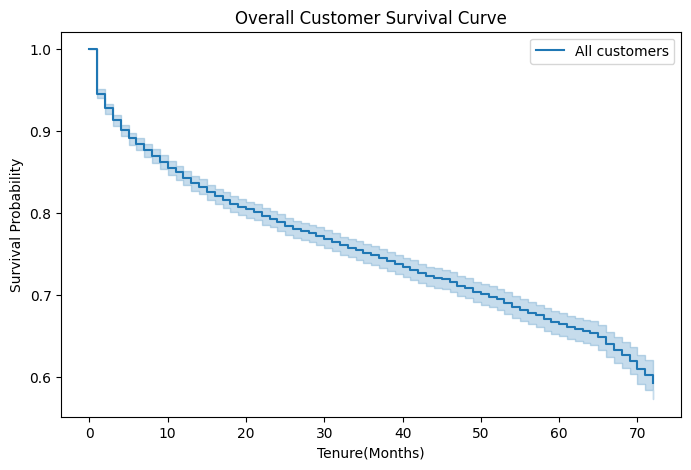

In [7]:
# How does a customer survival decline over time?

plt.figure(figsize=(8,5))
kmf = KaplanMeierFitter()
kmf.fit(durations=df['duration'],
                      event_observed = df['event'],
                      label = 'All customers')

kmf.plot_survival_function()
plt.title('Overall Customer Survival Curve')
plt.xlabel('Tenure(Months)')
plt.ylabel('Survival Probability')
plt.show()

This tells us that most of the customer churn in the starting 10 months tenure.

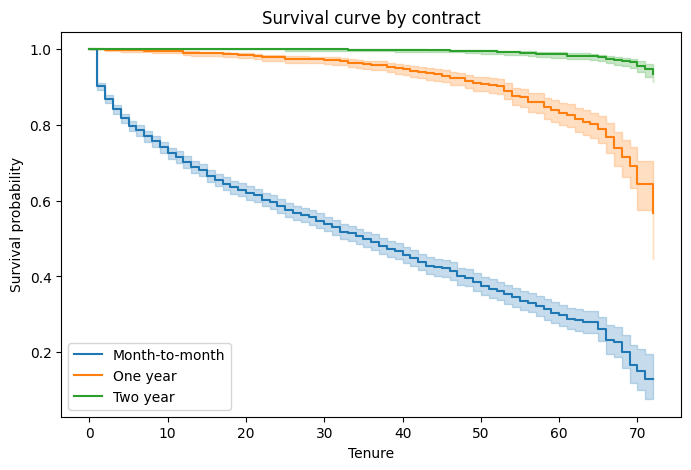

In [8]:
plt.figure(figsize=(8,5))

for contract in df['Contract'].unique():
    mask = df['Contract'] == contract
    kmf.fit(df.loc[mask, 'duration'],
            df.loc[mask, 'event'],
            label = contract)
    kmf.plot_survival_function()

plt.title('Survival curve by contract')
plt.xlabel('Tenure')
plt.ylabel('Survival probability')
plt.legend()
plt.show()

Month-to-Month customers churn significantly earlier.

In [9]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,event,duration
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,34
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,2
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,45
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,2


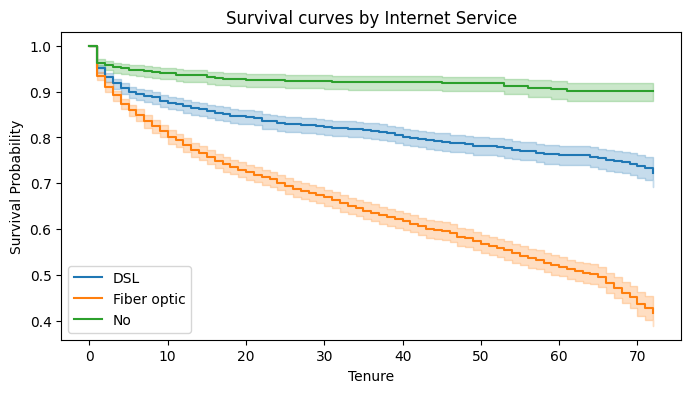

In [10]:
plt.figure(figsize=(8,4))

for method in df['InternetService'].unique():
    mask = df['InternetService'] == method
    kmf.fit(
        df.loc[mask, 'duration'],
        df.loc[mask, 'event'],
        label = method
    )
    kmf.plot_survival_function()

plt.title('Survival curves by Internet Service')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()


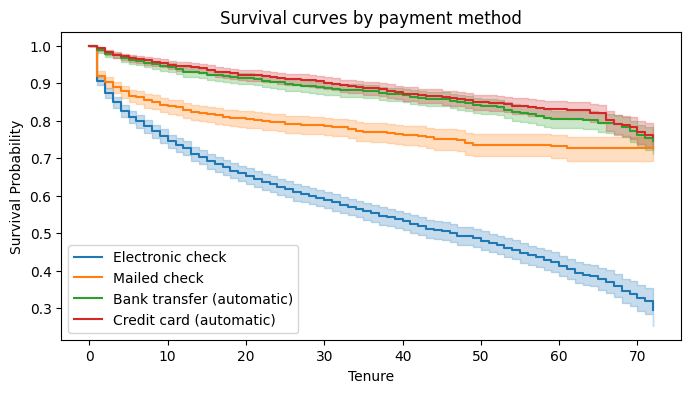

In [11]:
plt.figure(figsize=(8,4))

for method in df['PaymentMethod'].unique():
    mask = df['PaymentMethod'] == method
    kmf.fit(
        df.loc[mask, 'duration'],
        df.loc[mask, 'event'],
        label = method
    )
    kmf.plot_survival_function()

plt.title('Survival curves by payment method')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()


Electronic check users are more likely to churn, while auto-pay users have significantly longer survival

In [12]:
df['tenure_bucket'] = pd.cut(
    df['duration'],
    bins = [0,6,12,24,48,72],
    labels = ['0-6','6-12','12-24','24-48','48+']
)

df.groupby('tenure_bucket')['event'].mean()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1900\1932506218.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('tenure_bucket')['event'].mean()


tenure_bucket
0-6      0.533333
6-12     0.358865
12-24    0.287109
24-48    0.203890
48+      0.095132
Name: event, dtype: float64

0-6 months tenure has the highest probability of churn

from all this we can say:
- churn is time dependent
- Contract and payment method strongly influence churn timing
- Retention should focus on early lifecycle customers

#### Survival Modeling with Cox Proportional Hazards Model
##### The Cox Proportional Hazards Model is a widely used regression model in survival analysis that examines how different factors (covariates) affect the time until an event (like death, failure, or recovery) occurs, without requiring assumptions about the underlying event distribution.
##### It works by modeling the hazard rate (instantaneous risk of the event) as a function of covariates, assuming the effect of these factors remains constant (proportional) over time, allowing estimation of hazard ratios (HRs) that quantify the increased or decreased risk associated with each factor, such as age, gender, or treatment. 

In [13]:
cols = ['duration','event'] + [
    c for c in survival_df_enc.columns if c not in ['duration','event']
]

survival_df_enc = survival_df_enc[cols]

In [14]:
survival_df_enc.head()

,duration,event,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,29.85,29.85,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,34,0,0,56.95,1889.50,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,2,1,0,53.85,108.15,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,45,0,0,42.30,1840.75,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,2,1,0,70.70,151.65,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [15]:
survival_df_enc.isna().sum()

duration                                 0
event                                    0
SeniorCitizen                            0
MonthlyCharges                           0
TotalCharges                             0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMo

In [16]:
cph = CoxPHFitter(penalizer=0.1)  #Regularization

cph.fit(survival_df_enc,
        duration_col = 'duration',
        event_col = 'event')

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'duration'
                event col = 'event'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -13928.00
         time fit was run = 2026-01-11 14:55:10 UTC

---
                                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                              
SeniorCitizen                          0.05      1.05      0.05           -0.05            0.14                0.95                1.15
MonthlyCharges                         0.00      1.00      0.00            0.00            0.01                1.00                1.01
TotalCharges                          -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
gender_Male                           -0.03      0.97      0.04           -0.11            0.04                0.89                1.04
Partner_Yes                           -0.31      0.73      0.04           -0.39           -0.23                0.67                0.80
Dependents_Yes                        -0.15      0.86      0.05           -0.25           -0.05                0.78                0.95
PhoneService_Yes                       0.11      1.12      0.10           -0.08            0.31                0.92                1.36
MultipleLines_No phone service        -0.11      0.90      0.10           -0.31            0.08                0.74                1.09
MultipleLines_Yes                     -0.15      0.86      0.04           -0.24           -0.07                0.79                0.94
InternetService_Fiber optic            0.47      1.60      0.05            0.37            0.58                1.45                1.78
InternetService_No                    -0.22      0.80      0.09           -0.39           -0.06                0.68                0.95
OnlineSecurity_No internet service    -0.22      0.80      0.09           -0.39           -0.06                0.68                0.95
OnlineSecurity_Yes                    -0.43      0.65      0.05           -0.52           -0.33                0.59                0.72
OnlineBackup_No internet service      -0.22      0.80      0.09           -0.39           -0.06                0.68                0.95
OnlineBackup_Yes                      -0.31      0.73      0.04           -0.40           -0.22                0.67                0.80
DeviceProtection_No internet service  -0.22      0.80      0.09           -0.39           -0.06                0.68                0.95
DeviceProtection_Yes                  -0.18      0.83      0.05           -0.27           -0.09                0.76                0.91
TechSupport_No internet service       -0.22      0.80      0.09           -0.39           -0.06                0.68                0.95
TechSupport_Yes                       -0.34      0.71      0.05           -0.43           -0.24                0.65                0.79
StreamingTV_No internet service       -0.22      0.80      0.09           -0.39           -0.06                0.68                0.95
StreamingTV_Yes                        0.04      1.04      0.04           -0.05            0.12                0.95                1.13
StreamingMovies_No internet service   -0.22      0.80      0.09           -0.39           -0.06                0.68                0.95
StreamingMovies_Yes                    0.01      1.01      0.04           -0.08            0.10                0.92                1.10
Contract_One year                     -0.67      0.51      0.06           -0.78           -0.55                0.46                0.58
Contract_Two year                

- InternetService_Fiber optic = HR = 1.6
- Fiber customer churn 60% faster, controlling for other factors

- Contract_Two year = HR = .35
- Two year contract reduces churn risk by 65%

In [17]:
# Model validation

cph.concordance_index_

np.float64(0.9029398813185914)

In [18]:
# Assumption check

cph.check_assumptions(
    survival_df_enc,
    p_value_threshold=0.05
)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
         test_name = proportional_hazard_test

---
                                            test_statistic      p  -log2(p)
Contract_One year                     km             10.30 <0.005      9.55
                                      rank            5.72   0.02      5.90
Contract_Two year                     km             27.05 <0.005     22.27
                                      rank           20.41 <0.005     17.29
Dependents_Yes                        km              0.00   0.97      0.04
                                      rank            0.00   0.95      0.07
DeviceProtection_No internet service  km              0.31   0.58      0.79
                                      rank            0.33   0.57      0.82
DeviceProtection_Yes                  km              2.31   0.13      2.96
                                      rank            2.88   0.09      3.48
InternetService_Fiber optic           km              8.90 <0.005      8.46
                                      rank           10.32 <0.005      9.57
InternetService_No                    km              0.31   0.58      0.79
                                      rank            0.33   0.57      0.82
MonthlyCharges                        km              5.73   0.02      5.90
                                      rank            6.45   0.01      6.49
MultipleLines_No phone service        km              0.35   0.55      0.85
                                      rank            0.40   0.53      0.93
MultipleLines_Yes                     km             13.15 <0.005     11.76
                                      rank           16.25 <0.005     14.14
OnlineBackup_No internet service      km              0.31   0.58      0.79
                                      rank            0.33   0.57      0.82
OnlineBackup_Yes                      km              3.99   0.05      4.45
                                      rank            3.71   0.05      4.21
OnlineSecurity_No internet service    km              0.31   0.58      0.79
                                      rank            0.33   0.57      0.82
OnlineSecurity_Yes                    km              1.36   0.24      2.04
                                      rank            2.34   0.13      2.99
PaperlessBilling_Yes                  km              0.18   0.67      0.57
                                      rank            0.47   0.49      1.03
Partner_Yes                           km              2.85   0.09      3.46
                                      rank            4.22   0.04      4.64
PaymentMethod_Credit card (automatic) km              2.64   0.10      3.27
                                      rank            3.22   0.07      3.78
PaymentMethod_Electronic check        km              0.03   0.87      0.21
                                      rank            0.00   0.97      0.04
PaymentMethod_Mailed check            km              3.87   0.05      4.34
                                      rank            6.57   0.01      6.59
PhoneService_Yes                      km              0.35   0.55      0.85
                                      rank            0.40   0.53      0.93
SeniorCitizen                         km              0.15   0.70      0.51
                                      rank            0.23   0.63      0.67
StreamingMovies_No internet service   km              0.31   0.58      0.79
                                      rank            0.33   0.57      0.82
StreamingMovies_Yes                   km             11.40 <0.005     10.41
                                      rank           11.97 <0.005     10.85
StreamingTV_No internet service       km              0.31   0.58      0.79
                                      rank            0.33   0.57      0.



1. Variable 'MonthlyCharges' failed the non-proportional test: p-value is 0.0111.

   Advice 1: the functional form of the variable 'MonthlyCharges' might be incorrect. That is, there
may be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'MonthlyCharges' using pd.cut, and then specify it in
`strata=['MonthlyCharges', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'TotalCharges' failed the non-proportional test: p-value is 0.0243.

   Advice 1: the functional form of the variable 'TotalCharges' might be incorrect. That is, there
may be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] belo

[]

In [19]:
# Time varying effects for violation variables

violating_vars = [
    'Contract_One year',
    'Contract_Two year',
    'InternetService_Fiber optic',
    'MonthlyCharges',
    'MultipleLines_Yes',
    'StreamingTV_Yes',
    'StreamingMovies_Yes',
    'TotalCharges'
]

for var in violating_vars:
    survival_df_enc[f'{var}_log_time'] = survival_df_enc[var] * np.log(df['duration'])

In [20]:
survival_df_enc = survival_df_enc.fillna(0)

In [22]:
survival_df_enc.isna().sum()

duration                                 0
event                                    0
SeniorCitizen                            0
MonthlyCharges                           0
TotalCharges                             0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMo

In [23]:
np.isinf(survival_df_enc).sum().sort_values(ascending = False)

MonthlyCharges_log_time                  11
TotalCharges_log_time                    11
Contract_Two year_log_time               10
MultipleLines_Yes_log_time                4
StreamingTV_Yes_log_time                  4
Contract_One year_log_time                1
StreamingMovies_Yes_log_time              1
Partner_Yes                               0
gender_Male                               0
TotalCharges                              0
MonthlyCharges                            0
SeniorCitizen                             0
event                                     0
duration                                  0
Dependents_Yes                            0
OnlineBackup_No internet service          0
PhoneService_Yes                          0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes              

In [24]:
survival_df_enc.replace([np.inf, -np.inf], np.nan, inplace=True)

In [25]:
survival_df_enc = survival_df_enc.fillna(0)

In [26]:
cph_tv = CoxPHFitter(penalizer=0.1)

cph_tv.fit(survival_df_enc,
           duration_col = 'duration',
           event_col = 'event')

cph_tv.print_summary()

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'duration'
                event col = 'event'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -13466.37
         time fit was run = 2026-01-11 14:55:36 UTC

---
                                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                              
SeniorCitizen                          0.08      1.08      0.05           -0.02            0.17                0.98                1.19
MonthlyCharges                         0.01      1.01      0.00            0.00            0.01                1.00                1.01
TotalCharges                          -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
gender_Male                           -0.03      0.97      0.04           -0.10            0.05                0.90                1.05
Partner_Yes                           -0.23      0.79      0.04           -0.31           -0.15                0.73                0.86
Dependents_Yes                        -0.14      0.87      0.05           -0.25           -0.04                0.78                0.96
PhoneService_Yes                       0.24      1.27      0.10            0.04            0.43                1.04                1.54
MultipleLines_No phone service        -0.24      0.79      0.10           -0.43           -0.04                0.65                0.96
MultipleLines_Yes                      0.14      1.15      0.05            0.04            0.25                1.04                1.28
InternetService_Fiber optic            0.70      2.01      0.06            0.58            0.81                1.79                2.25
InternetService_No                    -0.25      0.78      0.09           -0.42           -0.08                0.66                0.92
OnlineSecurity_No internet service    -0.25      0.78      0.09           -0.42           -0.08                0.66                0.92
OnlineSecurity_Yes                    -0.33      0.72      0.05           -0.43           -0.23                0.65                0.79
OnlineBackup_No internet service      -0.25      0.78      0.09           -0.42           -0.08                0.66                0.92
OnlineBackup_Yes                      -0.19      0.83      0.05           -0.28           -0.10                0.76                0.90
DeviceProtection_No internet service  -0.25      0.78      0.09           -0.42           -0.08                0.66                0.92
DeviceProtection_Yes                  -0.06      0.94      0.05           -0.15            0.03                0.86                1.03
TechSupport_No internet service       -0.25      0.78      0.09           -0.42           -0.08                0.66                0.92
TechSupport_Yes                       -0.23      0.79      0.05           -0.33           -0.13                0.72                0.87
StreamingTV_No internet service       -0.25      0.78      0.09           -0.42           -0.08                0.66                0.92
StreamingTV_Yes                        0.23      1.26      0.05            0.13            0.34                1.13                1.40
StreamingMovies_No internet service   -0.25      0.78      0.09           -0.42           -0.08                0.66                0.92
StreamingMovies_Yes                    0.23      1.26      0.05            0.12            0.34                1.13                1.40
Contract_One year                     -0.41      0.66      0.07           -0.55           -0.26                0.57                0.77
Contract_Two year                

In [27]:
cph_tv.check_assumptions(survival_df_enc, p_value_threshold=0.05)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
         test_name = proportional_hazard_test

---
                                            test_statistic      p  -log2(p)
Contract_One year                     km              5.37   0.02      5.61
                                      rank            4.14   0.04      4.58
Contract_One year_log_time            km              2.03   0.15      2.70
                                      rank            0.88   0.35      1.52
Contract_Two year                     km              2.85   0.09      3.45
                                      rank            1.70   0.19      2.38
Contract_Two year_log_time            km              6.07   0.01      6.18
                                      rank            3.82   0.05      4.30
Dependents_Yes                        km              0.01   0.94      0.10
                                      rank            0.01   0.92      0.12
DeviceProtection_No internet service  km              0.36   0.55      0.87
                                      rank            0.40   0.53      0.92
DeviceProtection_Yes                  km              0.62   0.43      1.21
                                      rank            0.93   0.34      1.57
InternetService_Fiber optic           km              0.03   0.86      0.22
                                      rank            0.30   0.58      0.77
InternetService_Fiber optic_log_time  km             54.22 <0.005     42.35
                                      rank           51.48 <0.005     40.33
InternetService_No                    km              0.36   0.55      0.87
                                      rank            0.40   0.53      0.92
MonthlyCharges                        km              0.87   0.35      1.51
                                      rank            1.50   0.22      2.18
MonthlyCharges_log_time               km             92.35 <0.005     70.23
                                      rank           97.65 <0.005     74.08
MultipleLines_No phone service        km              0.56   0.46      1.13
                                      rank            0.64   0.43      1.23
MultipleLines_Yes                     km              1.15   0.28      1.82
                                      rank            2.53   0.11      3.16
MultipleLines_Yes_log_time            km              4.82   0.03      5.15
                                      rank            3.59   0.06      4.10
OnlineBackup_No internet service      km              0.36   0.55      0.87
                                      rank            0.40   0.53      0.92
OnlineBackup_Yes                      km              1.52   0.22      2.20
                                      rank            1.34   0.25      2.02
OnlineSecurity_No internet service    km              0.36   0.55      0.87
                                      rank            0.40   0.53      0.92
OnlineSecurity_Yes                    km              1.15   0.28      1.82
                                      rank            1.92   0.17      2.59
PaperlessBilling_Yes                  km              0.01   0.92      0.12
                                      rank            0.16   0.69      0.53
Partner_Yes                           km              0.38   0.54      0.89
                                      rank            0.95   0.33      1.60
PaymentMethod_Credit card (automatic) km              2.01   0.16      2.68
                                      rank            2.46   0.12      3.10
PaymentMethod_Electronic check        km              0.39   0.53      0.91
                                      rank            0.23   0.63      0.67
PaymentMethod_Mailed check            km              1.31   0.25      1.99
                                      rank            3.21   0.07      3.



1. Variable 'TotalCharges' failed the non-proportional test: p-value is 0.0005.

   Advice 1: the functional form of the variable 'TotalCharges' might be incorrect. That is, there
may be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'TotalCharges' using pd.cut, and then specify it in
`strata=['TotalCharges', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'Contract_One year' failed the non-proportional test: p-value is 0.0205.

   Advice: with so few unique values (only 2), you can include `strata=['Contract_One year', ...]`
in the call in `.fit`. See documentation in link [E] below.

3. Variable 'Contract_Two year_log_time' failed the non-proportional test: p-value is 0.0138

[]

all the variables are somewhat fixed but the Total charges variables is still causing violations, since we Total charges is just Monthly charges X tenure, i've decide to drop the columns completely from the data

In [28]:
survival_df_enc.drop(columns=['TotalCharges','TotalCharges_log_time'],inplace = True)

In [29]:
cph_tv = CoxPHFitter(penalizer=0.1)

cph_tv.fit(survival_df_enc,
           duration_col = 'duration',
           event_col = 'event')

cph_tv.print_summary()

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'duration'
                event col = 'event'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -13699.04
         time fit was run = 2026-01-11 14:55:41 UTC

---
                                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                              
SeniorCitizen                          0.07      1.07      0.05           -0.03            0.16                0.97                1.18
MonthlyCharges                         0.01      1.01      0.00            0.00            0.01                1.00                1.01
gender_Male                           -0.03      0.97      0.04           -0.11            0.05                0.90                1.05
Partner_Yes                           -0.28      0.75      0.04           -0.37           -0.20                0.69                0.82
Dependents_Yes                        -0.15      0.86      0.05           -0.25           -0.05                0.78                0.95
PhoneService_Yes                       0.20      1.22      0.10            0.00            0.39                1.00                1.48
MultipleLines_No phone service        -0.20      0.82      0.10           -0.39           -0.00                0.68                1.00
MultipleLines_Yes                      0.15      1.16      0.05            0.05            0.26                1.05                1.29
InternetService_Fiber optic            0.72      2.05      0.06            0.60            0.83                1.83                2.30
InternetService_No                    -0.22      0.81      0.09           -0.39           -0.05                0.68                0.95
OnlineSecurity_No internet service    -0.22      0.81      0.09           -0.39           -0.05                0.68                0.95
OnlineSecurity_Yes                    -0.42      0.66      0.05           -0.52           -0.32                0.60                0.73
OnlineBackup_No internet service      -0.22      0.81      0.09           -0.39           -0.05                0.68                0.95
OnlineBackup_Yes                      -0.30      0.74      0.05           -0.39           -0.21                0.68                0.81
DeviceProtection_No internet service  -0.22      0.81      0.09           -0.39           -0.05                0.68                0.95
DeviceProtection_Yes                  -0.13      0.88      0.05           -0.22           -0.04                0.80                0.96
TechSupport_No internet service       -0.22      0.81      0.09           -0.39           -0.05                0.68                0.95
TechSupport_Yes                       -0.30      0.74      0.05           -0.40           -0.20                0.67                0.82
StreamingTV_No internet service       -0.22      0.81      0.09           -0.39           -0.05                0.68                0.95
StreamingTV_Yes                        0.26      1.29      0.05            0.15            0.36                1.16                1.44
StreamingMovies_No internet service   -0.22      0.81      0.09           -0.39           -0.05                0.68                0.95
StreamingMovies_Yes                    0.25      1.29      0.05            0.14            0.36                1.15                1.43
Contract_One year                     -0.46      0.63      0.07           -0.61           -0.32                0.54                0.73
Contract_Two year                     -0.82      0.44      0.07           -0.97           -0.67                0.38                0.51
PaperlessBilling_Yes             

In [30]:
cph_tv.check_assumptions(survival_df_enc, p_value_threshold=0.05)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
         test_name = proportional_hazard_test

---
                                            test_statistic      p  -log2(p)
Contract_One year                     km              4.71   0.03      5.06
                                      rank            3.28   0.07      3.83
Contract_One year_log_time            km              1.30   0.25      1.97
                                      rank            0.24   0.63      0.68
Contract_Two year                     km              3.86   0.05      4.33
                                      rank            3.06   0.08      3.64
Contract_Two year_log_time            km              7.59   0.01      7.41
                                      rank            5.96   0.01      6.09
Dependents_Yes                        km              0.02   0.88      0.18
                                      rank            0.02   0.88      0.19
DeviceProtection_No internet service  km              0.05   0.83      0.27
                                      rank            0.06   0.81      0.30
DeviceProtection_Yes                  km              0.06   0.81      0.30
                                      rank            0.04   0.84      0.26
InternetService_Fiber optic           km              0.15   0.70      0.52
                                      rank            0.01   0.92      0.12
InternetService_Fiber optic_log_time  km             29.00 <0.005     23.72
                                      rank           22.90 <0.005     19.16
InternetService_No                    km              0.05   0.83      0.27
                                      rank            0.06   0.81      0.30
MonthlyCharges                        km              0.11   0.74      0.44
                                      rank            0.43   0.51      0.97
MonthlyCharges_log_time               km             69.56 <0.005     53.58
                                      rank           64.11 <0.005     49.59
MultipleLines_No phone service        km              0.03   0.87      0.19
                                      rank            0.04   0.83      0.26
MultipleLines_Yes                     km              1.28   0.26      1.95
                                      rank            2.90   0.09      3.50
MultipleLines_Yes_log_time            km              1.67   0.20      2.35
                                      rank            0.41   0.52      0.94
OnlineBackup_No internet service      km              0.05   0.83      0.27
                                      rank            0.06   0.81      0.30
OnlineBackup_Yes                      km              0.04   0.85      0.23
                                      rank            0.26   0.61      0.71
OnlineSecurity_No internet service    km              0.05   0.83      0.27
                                      rank            0.06   0.81      0.30
OnlineSecurity_Yes                    km              0.09   0.76      0.40
                                      rank            0.21   0.65      0.63
PaperlessBilling_Yes                  km              0.00   1.00      0.01
                                      rank            0.11   0.75      0.42
Partner_Yes                           km              0.00   0.95      0.07
                                      rank            0.06   0.80      0.32
PaymentMethod_Credit card (automatic) km              1.70   0.19      2.38
                                      rank            2.02   0.16      2.68
PaymentMethod_Electronic check        km              0.58   0.45      1.16
                                      rank            0.54   0.46      1.11
PaymentMethod_Mailed check            km              1.99   0.16      2.66
                                      rank            3.79   0.05      4.



1. Variable 'StreamingTV_Yes' failed the non-proportional test: p-value is 0.0462.

   Advice: with so few unique values (only 2), you can include `strata=['StreamingTV_Yes', ...]` in
the call in `.fit`. See documentation in link [E] below.

2. Variable 'Contract_One year' failed the non-proportional test: p-value is 0.0299.

   Advice: with so few unique values (only 2), you can include `strata=['Contract_One year', ...]`
in the call in `.fit`. See documentation in link [E] below.

3. Variable 'Contract_Two year' failed the non-proportional test: p-value is 0.0496.

   Advice: with so few unique values (only 2), you can include `strata=['Contract_Two year', ...]`
in the call in `.fit`. See documentation in link [E] below.

4. Variable 'PaymentMethod_Mailed check' failed the non-proportional test: p-value is 0.0514.

   Advice: with so few unique values (only 2), you can include `strata=['PaymentMethod_Mailed
check', ...]` in the call in `.fit`. See documentation in link [E] below.



[]

<Axes: title={'center': 'Predicted survival curve for customer'}>

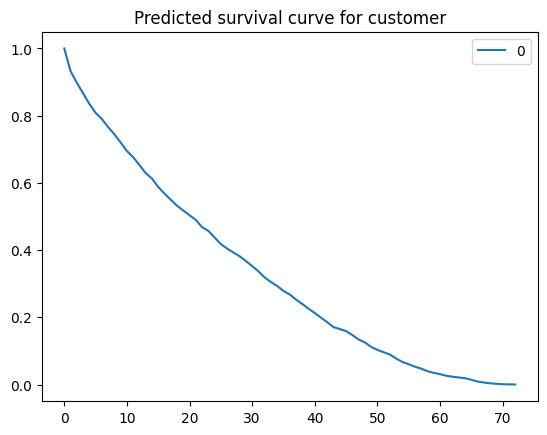

In [36]:
# individual survival prediction

sample_customer = survival_df_enc.drop(columns=['duration','event']).iloc[[0]]

survival_curve = cph_tv.predict_survival_function(sample_customer)

survival_curve.plot(title = 'Predicted survival curve for customer')

In [ ]:
def churn_probability_within(model, X, months):
    surv = model.predict_survival_function(X, times = [months])
    return 1 - surv.T.squeeze()

survival_df_enc['churn_3m'] = churn_probability_within(cph_tv,
                                                      survival_df_enc.drop(columns = ['duration','event']),
                                                      3)

survival_df_enc['churn_6m']= churn_probability_within(cph_tv,
                                                      survival_df_enc.drop(columns = ['duration','event']),
                                                      6)

now we have the probability of churn for each customer.

In [40]:
survival_df_enc['expected_life']= cph_tv.predict_expectation(
    survival_df_enc.drop(columns=['duration','event'])
)

#### Customer lifetime value

CLV ~ Monthly revenue X Expected remaining lifetime

In [43]:
survival_df_enc['MonthlyCharges'] = df['MonthlyCharges'].values

In [44]:
survival_df_enc['CLV'] = (survival_df_enc['MonthlyCharges'] * survival_df_enc['expected_life'])

In [45]:
survival_df_enc['CLV'].describe()

count    7043.000000
mean     2976.752669
std      2212.471710
min       113.561695
25%      1183.894839
50%      2148.844289
75%      4660.696689
max      8464.792594
Name: CLV, dtype: float64

<Axes: ylabel='Frequency'>

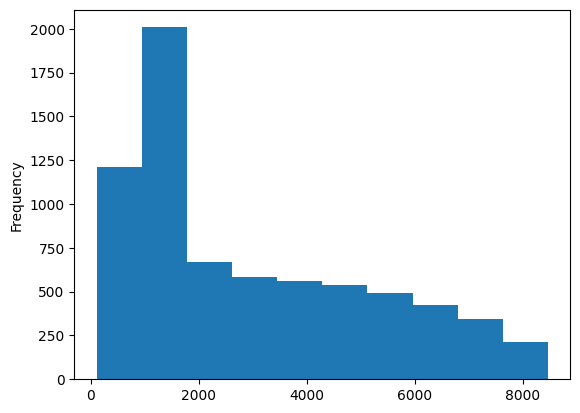

In [52]:
survival_df_enc['CLV'].plot(kind = 'hist')

In [53]:
survival_df_enc['CLV_segment'] = pd.qcut(
    survival_df_enc['CLV'],
        q = [0,0.5,0.8,1.0],
        labels = ['Low','Medium','High']
)

In [57]:
survival_df_enc["risk_segment"] = pd.qcut(
    survival_df_enc["churn_6m"],
    q=[0, 0.7, 0.9, 1.0],
    labels=["Low Risk", "Medium Risk", "High Risk"]
)

In [58]:
def retention_action(row):
    if row["CLV_segment"] == "High" and row["risk_segment"] == "High Risk":
        return "Immediate Retention"
    if row["CLV_segment"] == "High" and row["risk_segment"] == "Low Risk":
        return "Monitor"
    if row["CLV_segment"] == "Low" and row["risk_segment"] == "High Risk":
        return "No Action"
    return "Ignore"

survival_df_enc["action"] = survival_df_enc.apply(retention_action, axis=1)


#### Visualization

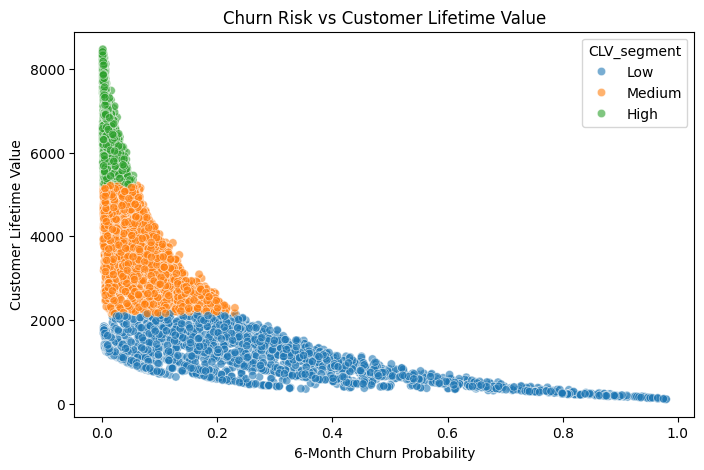

In [64]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=survival_df_enc,
    x="churn_6m",
    y="CLV",
    hue="CLV_segment",
    alpha=0.6
)
plt.title("Churn Risk vs Customer Lifetime Value")
plt.xlabel("6-Month Churn Probability")
plt.ylabel("Customer Lifetime Value")
plt.show()


##### So, who should we spend money on to prevent churn? (profit maximization)

#### Core formula:

` Expected value = (CLV X Retention success probability) - Retention cost`

only intervene if: 
`Expected value > 0`

In [66]:
#assumptions

Retention_cost = 500      

def retention_probability(risk_segment):
    if risk_segment == 'High Risk':
        return 0.4
    elif risk_segment == 'Medium Risk':
        return 0.25
    else:
        return 0.1

In [69]:
survival_df_enc['retention_success_prob'] = survival_df_enc['risk_segment'].apply(retention_probability)

In [79]:
survival_df_enc['retention_success_prob'] = survival_df_enc['retention_success_prob'].astype('float')
survival_df_enc.dtypes


duration                                    int64
event                                       int64
SeniorCitizen                               int64
MonthlyCharges                            float64
gender_Male                                 int64
Partner_Yes                                 int64
Dependents_Yes                              int64
PhoneService_Yes                            int64
MultipleLines_No phone service              int64
MultipleLines_Yes                           int64
InternetService_Fiber optic                 int64
InternetService_No                          int64
OnlineSecurity_No internet service          int64
OnlineSecurity_Yes                          int64
OnlineBackup_No internet service            int64
OnlineBackup_Yes                            int64
DeviceProtection_No internet service        int64
DeviceProtection_Yes                        int64
TechSupport_No internet service             int64
TechSupport_Yes                             int64


In [80]:
# Expected value

survival_df_enc['expected_retention_value'] = (survival_df_enc['CLV'] * survival_df_enc['retention_success_prob'])

In [82]:
survival_df_enc['net_value'] = (survival_df_enc['expected_retention_value'] - Retention_cost)

In [85]:
survival_df_enc.sort_values(by = 'net_value', ascending= False)

,duration,event,SeniorCitizen,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,churn_3m,churn_6m,expected_life,CLV,CLV_segment,risk_segment,action,retention_success_prob,expected_retention_value,net_value
2265,12,1,0,112.95,1,0,0,1,0,1,...,0.076605,0.122949,34.041734,3845.013845,Medium,Medium Risk,Ignore,0.25,961.253461,461.253461
880,10,1,0,110.10,1,0,0,1,0,0,...,0.083780,0.134139,32.306316,3556.925385,Medium,Medium Risk,Ignore,0.25,889.231346,389.231346
6821,18,1,0,99.85,0,0,0,1,0,1,...,0.074325,0.119382,34.626876,3457.493608,Medium,Medium Risk,Ignore,0.25,864.373402,364.373402
2960,22,1,0,100.75,1,0,0,1,0,1,...,0.075544,0.121289,34.311930,3456.926903,Medium,Medium Risk,Ignore,0.25,864.231726,364.231726
4701,21,0,1,104.35,1,0,0,1,0,1,...,0.080309,0.128733,33.126288,3456.728178,Medium,Medium Risk,Ignore,0.25,864.182045,364.182045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6866,1,1,0,95.45,1,0,0,1,0,1,...,0.893012,0.974754,1.292448,123.364201,Low,High Risk,No Action,0.40,49.345680,-450.654320
2577,1,1,0,94.60,0,0,0,1,0,1,...,0.898660,0.976910,1.257166,118.927880,Low,High Risk,No Action,0.40,47.571152,-452.428848
3209,1,1,0,93.85,0,0,0,1,0,1,...,0.897536,0.976487,1.264178,118.643107,Low,High Risk,No Action,0.40,47.457243,-452.542757
4800,1,1,1,94.00,1,0,0,1,0,1,...,0.906262,0.979691,1.209916,113.732126,Low,High Risk,No Action,0.40,45.492850,-454.507150


In [86]:
survival_df_enc['retain_decision'] = np.where(
    survival_df_enc['net_value'] > 0,
    'Target for retention',
    'Do not target'
)

In [87]:
survival_df_enc['retain_decision'].value_counts()

retain_decision
Do not target           5109
Target for retention    1934
Name: count, dtype: int64

##### 1934 of the customers are to be targeted for retention.

##### let's compare risk based and expected value based retention strategies

In [88]:
top_risk_cutoff = survival_df_enc["churn_6m"].quantile(0.85)

survival_df_enc["risk_based_target"] = np.where(
    survival_df_enc["churn_6m"] >= top_risk_cutoff,
    "Target",
    "No Target"
)


In [89]:
# risk based

risk_profit = survival_df_enc.loc[survival_df_enc['risk_based_target'] == 'Target', 'net_value'].sum()

In [92]:
# Expected value based

exp_value_based_profit = survival_df_enc.loc[survival_df_enc['retain_decision']== 'Target for retention','net_value'].sum()

In [93]:
print("Risk-based strategy profit:", risk_profit)
print("Profit-based strategy profit:", exp_value_based_profit)


Risk-based strategy profit: -283878.2841063174
Profit-based strategy profit: 274495.40132210415


In [94]:
survival_df_enc.groupby("retain_decision").agg(
    customers=("CLV", "count"),
    avg_clv=("CLV", "mean"),
    avg_net_value=("net_value", "mean")
)


,customers,avg_clv,avg_net_value
retain_decision,,,
Do not target,5109,1953.742993,-244.581595
Target for retention,1934,5679.212047,141.931438
